**The following code was part of the simulations presented in https://journals.aps.org/prresearch/abstract/10.1103/PhysRevResearch.2.023144.**

If you use any part of it, please cite:
**G. Nicoletti, S. Suweis, A. Maritan. "Scaling and criticality in a phenomenological renormalization group", Phys. Rev. Research, vol. 2, p. 023144, 2020.**

In [1]:
import numpy as np

In [2]:
# Disclaimer: the core code of the CP simulation
# was written years ago for Python 2.7 and has
# never been optimized, apart from minimal changes
# to make it work in Python 3+.
# I will rewrite most of the core functions
# in the future if I have the time.
import lib.contact_process as cp

# Using numba by default. Change the flag in
# lib/binomial.py if you wish not to use it.
import lib.binomial as binomial_process

import lib.fun

**Contact process (see section III of the paper).**

End init
Found.
Printing image...


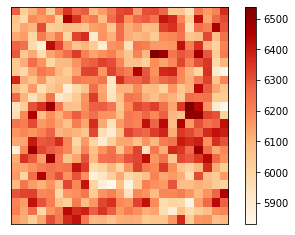

In [4]:
L = 25
lag = 200
Lambda = 3
Nsamples = 10000
states_list, real_time = cp.find_avalanche(L, Nsamples*lag, Lambda, lag)

Unraveling neurons...
Done.
Building covariance matrix...
Done
Printing correlation matrix...


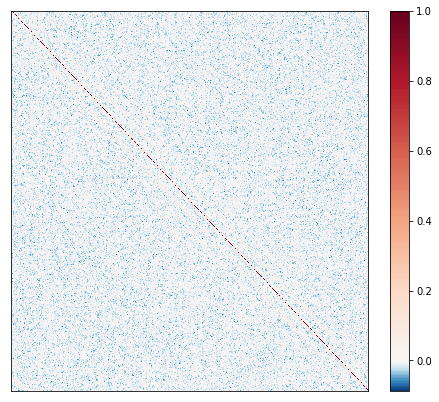

In [5]:
x_timeseries = cp.linearize_lattice(states_list)
covariance, correlations = lib.fun.evaluate_cov_corr(x_timeseries)

**Binomial model (see appendix B of the paper).**

In [6]:
Nsamples = int(1e5)
Nvar = 100
p_firing = binomial_process.init_firing_probabilities(Nsamples)

In [7]:
x_timeseries = binomial_process.binomial_process(Nvar, Nsamples, p_firing)

Building covariance matrix...
Done
Printing correlation matrix...


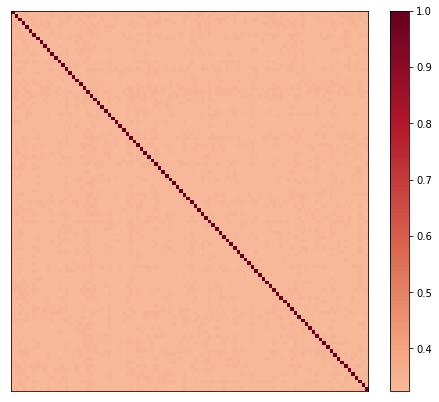

In [8]:
covariance, correlations = lib.fun.evaluate_cov_corr(x_timeseries)